In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from trunk_filter.composite_filter import NonCausalTrunkFilter
from trunk_filter.utils import integrate_positions_from_velocity, get_data_array_from_dataframe, get_dataframe_from_data_array

In [37]:
df = pd.read_csv('../data/long_rollouts_100_max_amplitude_80_policy_harmonic_inputs/train/raw/data.csv')

df = df[:1000]
df2 = df.copy()

In [38]:
def filter_data(df):
    filter_func = NonCausalTrunkFilter(num_nodes=4, measurement_noise=1e-1, position_process_noise=0, velocity_process_noise=1e1)
    real_data_array = get_data_array_from_dataframe(df)[:,:,::2]
    filtered_data = integrate_positions_from_velocity(real_data_array, filter_func.update_from_array(real_data_array))
    return get_dataframe_from_data_array(filtered_data, join_with=df)


In [39]:

df = filter_data(df)

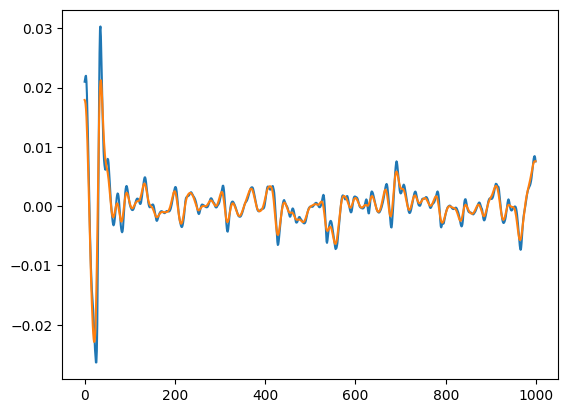

In [40]:
plt.plot(df2['vz2'].to_numpy(), label='x')
plt.plot(df['vz2'].to_numpy(), label='x')

<Axes: >

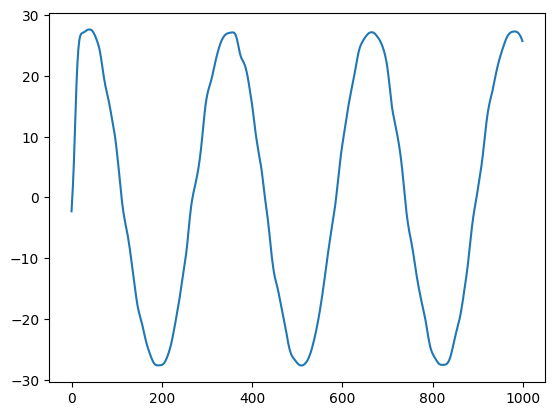

In [41]:
df['ux2'].plot()

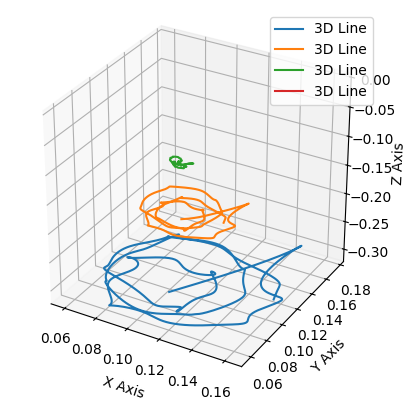

In [42]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(df['x4'].to_numpy(), df['y4'].to_numpy(), df['z4'].to_numpy(), label='3D Line')
ax.plot(df['x3'].to_numpy(), df['y3'].to_numpy(), df['z3'].to_numpy(), label='3D Line')
ax.plot(df['x2'].to_numpy(), df['y2'].to_numpy(), df['z2'].to_numpy(), label='3D Line')
ax.plot(df['x1'].to_numpy(), df['y1'].to_numpy(), df['z1'].to_numpy(), label='3D Line')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_box_aspect([1, 1, 1])  # Set the aspect ratio to be equal
plt.legend()
plt.show()

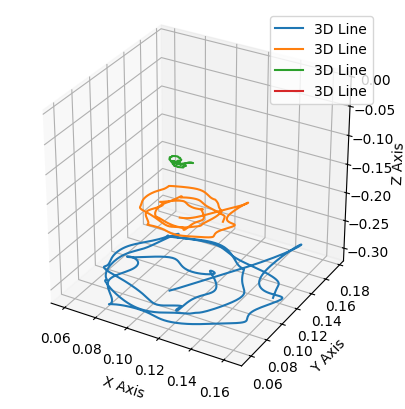

In [43]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(df2['x4'].to_numpy(), df2['y4'].to_numpy(), df2['z4'].to_numpy(), label='3D Line')
ax.plot(df2['x3'].to_numpy(), df2['y3'].to_numpy(), df2['z3'].to_numpy(), label='3D Line')
ax.plot(df2['x2'].to_numpy(), df2['y2'].to_numpy(), df2['z2'].to_numpy(), label='3D Line')
ax.plot(df2['x1'].to_numpy(), df2['y1'].to_numpy(), df2['z1'].to_numpy(), label='3D Line')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_box_aspect([1, 1, 1])  # Set the aspect ratio to be equal
plt.legend()
plt.show()